In [1]:
library(microbenchmark)

# Naive Top-Down Rod Cutting Algorithm

In [2]:
cut_rod_naive <- function(p, n) {
    if (n == 0) return(0)
    q = - Inf
    for (i in 1:n) {
        q = max(q, p[i] + cut_rod_naive(p, n-i))
    }
    return(q)
}

In [3]:
p <- c(1, 5, 8, 9, 10, 17, 17, 20, 24, 30)
rbind(1:10, p)

,1,2,3,4,5,6,7,8,9,10
p,1,5,8,9,10,17,17,20,24,30


In [4]:
cut_rod_naive(p, 5)

[1] 13

In [5]:
cut_rod_naive(p, 7)

[1] 18

In [6]:
cut_rod_naive(p, 9)

[1] 25

In [7]:
cut_rod_naive(p, 10)

[1] 30

# Top-down Rod Cut with Memoization

In [8]:
mem_cut_rod <- function(p, n, r) {
    if (n == 0) return(0)
    if (r[n] > 0) return(r[n])
    q = - Inf
    for (i in 1:n) {
        q = max(q, p[i] + mem_cut_rod(p, n-i, r))
    }
    r[n] = q
    return(q)
}
cut_rod_top_down <- function(p, n) {
    r <- rep(-Inf, n)
    return( mem_cut_rod(p, n, r) )
}

In [9]:
cut_rod_top_down(p, 5)
cut_rod_top_down(p, 10)

[1] 13

[1] 30

## Better implementation

In [14]:
mem_cut_rod2 <- function(p, n) {
  if (n == 0) return(0)
  if (r[n] > 0) return(r[n])
  q = - Inf
  for (i in 1:n) {
    q = max(q, p[i] + mem_cut_rod2(p, n-i))
  }
  r[n] <<- q
  return(q)
}

cut_rod_top_down2 <- function(p, n) {
  return( mem_cut_rod2(p, n) )
}

In [15]:
n <- length(p)
r <- rep(-Inf, n)
cut_rod_top_down2(p, 5)
cut_rod_top_down2(p, 10)

[1] 13

[1] 30

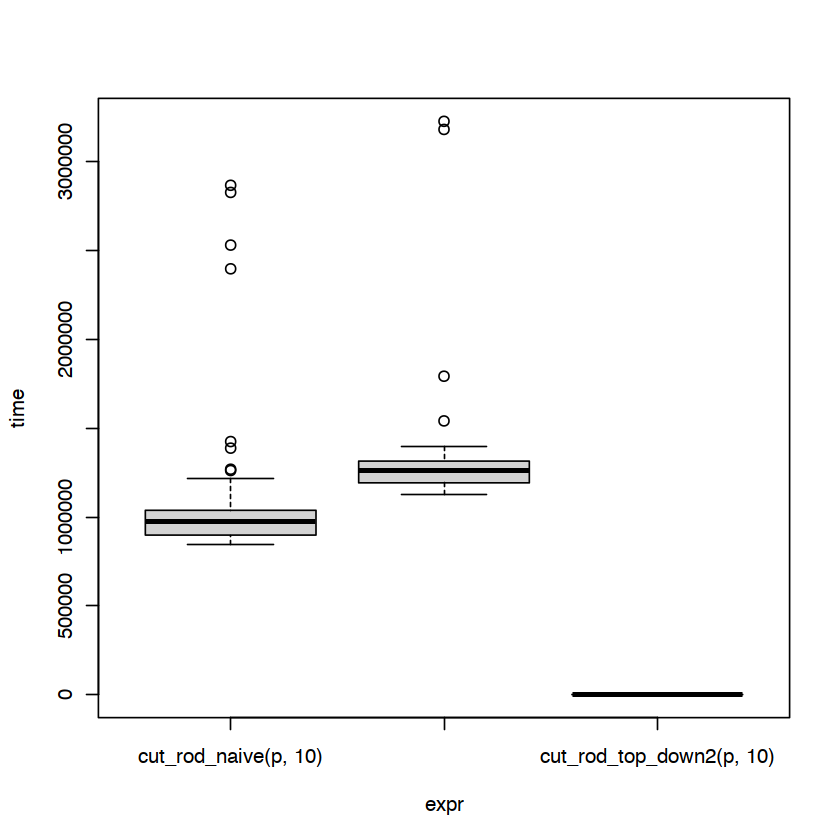

In [19]:
bench <- microbenchmark(cut_rod_naive(p, 10), cut_rod_top_down(p, 10), cut_rod_top_down2(p, 10))
plot(bench)

## Closure implementation

In [25]:
cut_rod_top_down_closure <- function(p, n) {
    r <- rep(-Inf, n)
    return(function(p, n) {
        if (n == 0) return(0)
        if (r[n] > 0) return(r[n])
        q = -Inf
        for (i in 1:n) {
            q = max(q, p[i] + mem_cut_rod2(p, n - i))
        }
        r[n] <<- q
        return(q)
    })
    
}


cut_rod_top_down_closure(p, 10)(p, 10)

[1] 30

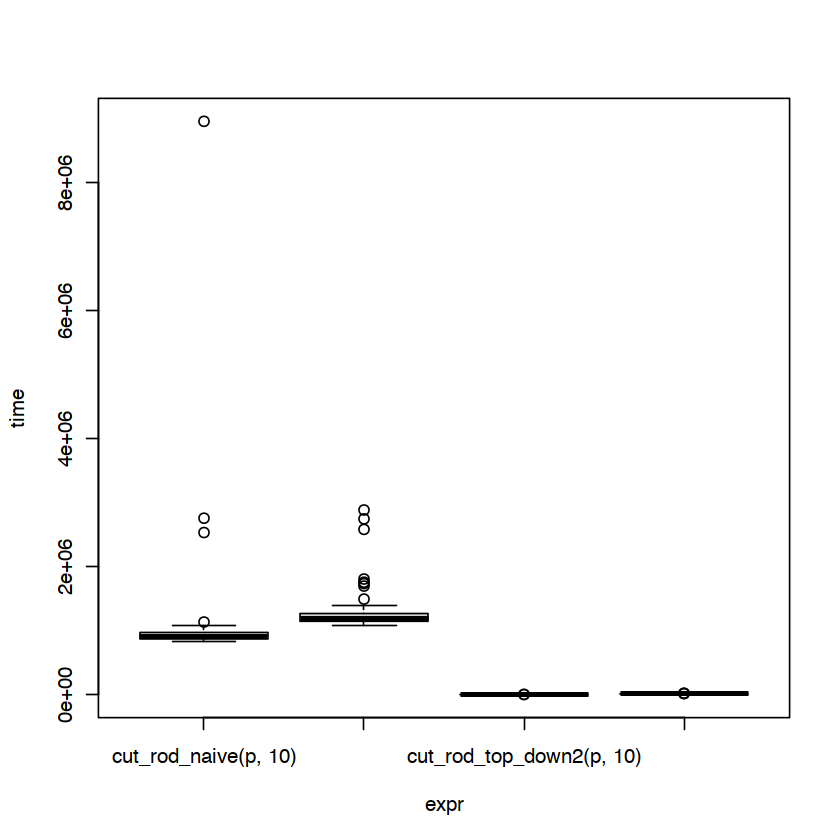

In [26]:
bench <- microbenchmark(cut_rod_naive(p, 10), cut_rod_top_down(p, 10), cut_rod_top_down2(p, 10), cut_rod_top_down_closure(p, 10)(p, 10))
plot(bench)

# Bottom-up Rod Cut

In [22]:
cut_rod_bottom_up <- function(p, n) {
    r <- rep(-Inf, n + 1)
    r[1] = 0 # r(0), R index starts from 1
    if (n == 1) return(1)
    for (j in 1:n) {
        q = -Inf
        for (i in 1:j) {
            q = max(q, p[i] + r[j-i + 1])
        }
        r[j+1] = q
    }
    return(r[n+1])
}

In [23]:
cut_rod_bottom_up(p, 5)
cut_rod_bottom_up(p, 10)

[1] 13

[1] 30

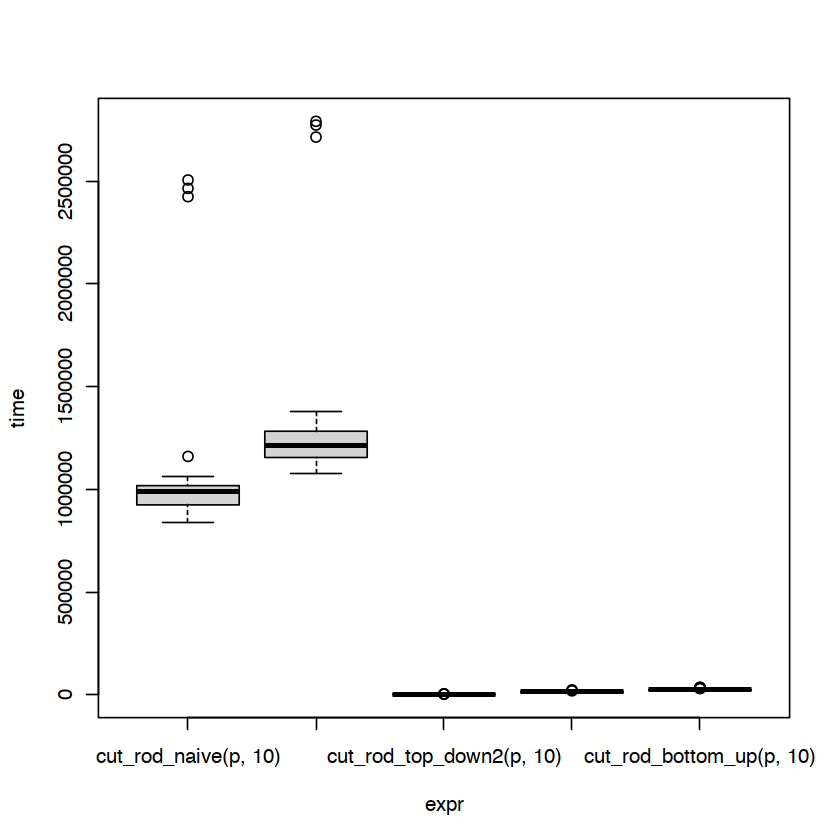

In [24]:
bench <- microbenchmark(cut_rod_naive(p, 10), cut_rod_top_down(p, 10), cut_rod_top_down2(p, 10), cut_rod_top_down_closure(p, 10)(p, 10), cut_rod_bottom_up(p, 10))
plot(bench)

# Printing Out Cuts

In [37]:
cut_rod_bottom_up_extended <- function(p, n) {
    r <- rep(-Inf, n + 1)
    s <- rep(0, n)
    r[1] = 0 # r(0), R index starts from 1
    if (n == 1) return(1)
    for (j in 1:n) {
        q = -Inf
        for (i in 1:j) {
            if (q < p[i] + r[j-i + 1] ) {
                q = p[i] + r[j-i + 1]
                s[j] = i
            }
        }
        r[j+1] = q
    }
    return(list(r = r, s=s))
}

print_cut_rod <- function(p, n) {
    re_lt <- cut_rod_bottom_up_extended(p, n)
    s <- re_lt$s
    while(n>0) {
        print(s[n])
        n = n - s[n]
    }
}

In [38]:
print_cut_rod(p, 9)

[1] 3
[1] 6


# Sub-run sum

In [30]:
subrun_sum <- function(x) {
    # return the largest subseq sum, empty will be zero
    sum_by_ind <- 0
    max_sum <- 0
    for (i in seq(x)) {
        sum_by_ind <- max(sum_by_ind + x[i], x[i])
        max_sum <- max(max_sum, sum_by_ind)
    }
    return(max_sum)
}

In [32]:
a <- c(-3, 5, 4, 9, -10, 20)
subrun_sum(a)

[1] 28

In [33]:
a <- c(-3, 5, 4, 9, -10, 100)
subrun_sum(a)

[1] 108

In [35]:
a <- rep(-1, 10)
subrun_sum(a)

[1] 0